# Task 2

Import all the necessary packages

In [ ]:
!pip install dython

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import scipy.stats
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from dython.nominal import associations
from math import inf

%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 9)

Load avocado data and check it

Legend:
* Date - date of the observation
* AveragePrice - average price of a single avocado
* Total Volume - total number of avocados sold
* 4046 - total number of avocados with PLU 4046 sold
* 4225 - total number of avocados with PLU 4225 sold
* 4770 - total number of avocados with PLU 4770 sold
* Total Bags
* Small Bags
* Large Bags
* XLarge Bags
* type - conventional or organic
* year
* region




In [ ]:
df = pd.read_csv("avocado.csv")

In [ ]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df = df.drop(columns='Unnamed: 0')

In [ ]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df.columns = ["date", "average_price", "total_volume", "4046", "4225", "4770", "total_bags", "small_bags", "large_bags", "xlarge_bags", "type", "year", "region"]

In [ ]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df.describe()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
df.shape

(18249, 13)

In [ ]:
df.groupby("year").count()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,region
year,,,,,,,,,,,,
2015,5615,5615,5615,5615,5615,5615,5615,5615,5615,5615,5615,5615
2016,5616,5616,5616,5616,5616,5616,5616,5616,5616,5616,5616,5616
2017,5722,5722,5722,5722,5722,5722,5722,5722,5722,5722,5722,5722
2018,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296


In [ ]:
df = df[~(df.year == 2018)]

In [ ]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df.year.value_counts()

2017    5722
2016    5616
2015    5615
Name: year, dtype: int64

In [ ]:
df.year.unique()

array([2015, 2016, 2017])

### Preparation
I need subsample with 5-10 random variables, at least half of
them should be described with continuous random variable type. Target variable
should be continuous.

In [ ]:
subsample_columns = ['total_bags', # target
                     'year', # categorical
                     'average_price', # predictor
                     'total_volume',  # predictor
                     '4046', # predictor
                     '4225', # predictor
                     '4770', # predictor
                     'small_bags', # predictor
                     'large_bags', # predictor
                     'xlarge_bags'] # predictor

predictors = subsample_columns[2:]
categorial = subsample_columns[1]
target = subsample_columns[0]
df = df[subsample_columns]

In [ ]:
df.head()

,total_bags,year,average_price,total_volume,4046,4225,4770,small_bags,large_bags,xlarge_bags
0,8696.87,2015,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0
1,9505.56,2015,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0
2,8145.35,2015,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0
3,5811.16,2015,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0
4,6183.95,2015,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0


### Step 1
I need to make a non-parametric estimation of PDF in form of histogram and using
kernel density function for MRV (or probability law in case of discrete MRV).

Let's do it :)

In [ ]:
pic_size=10

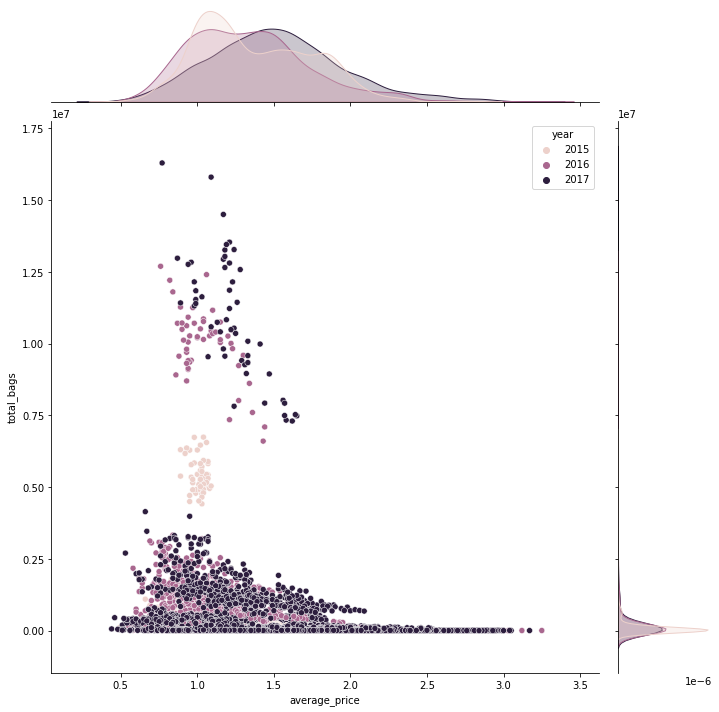

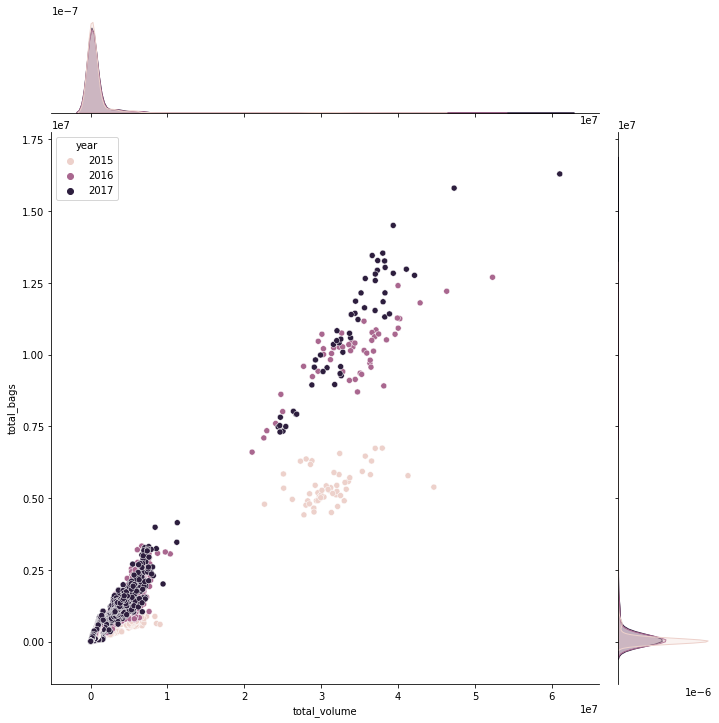

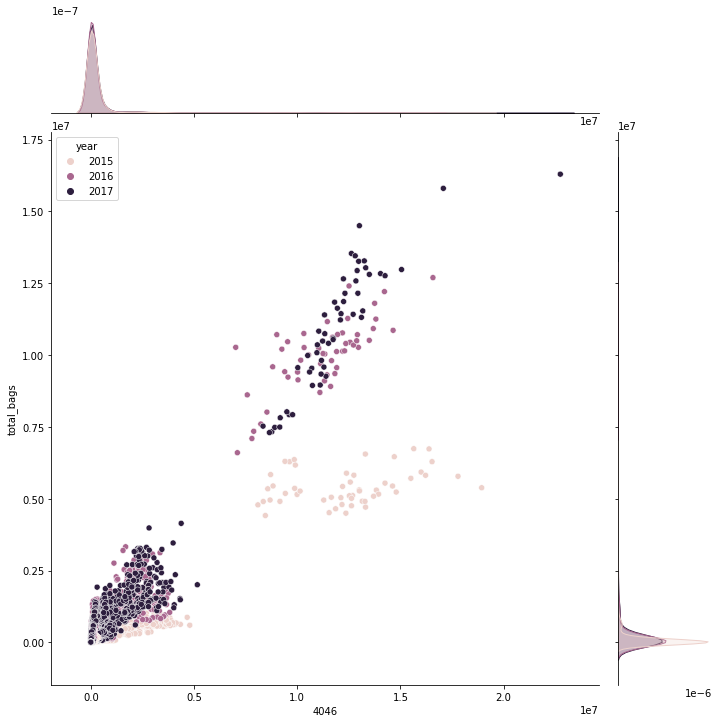

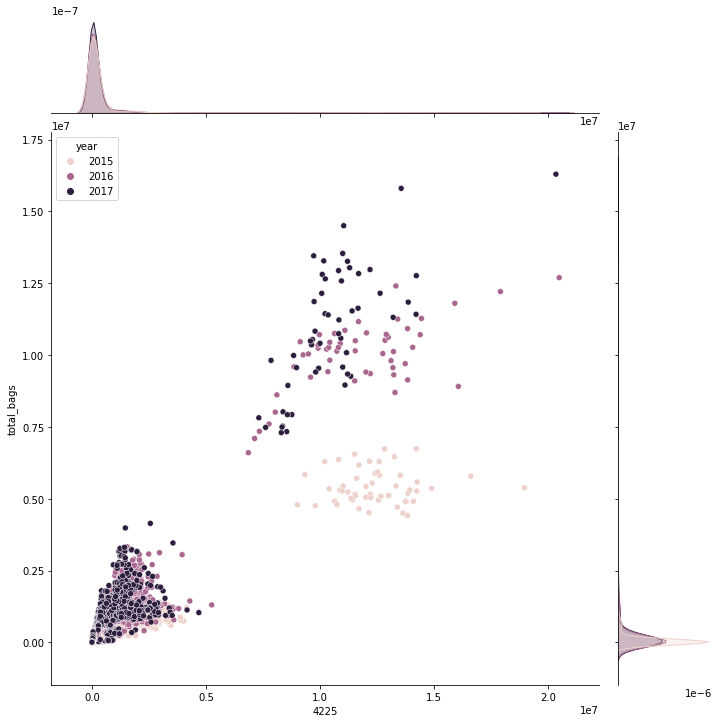

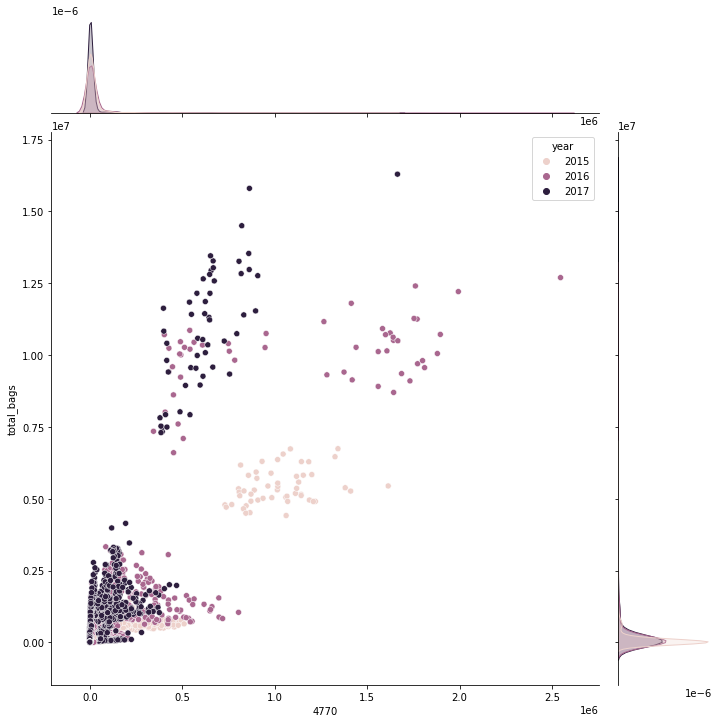

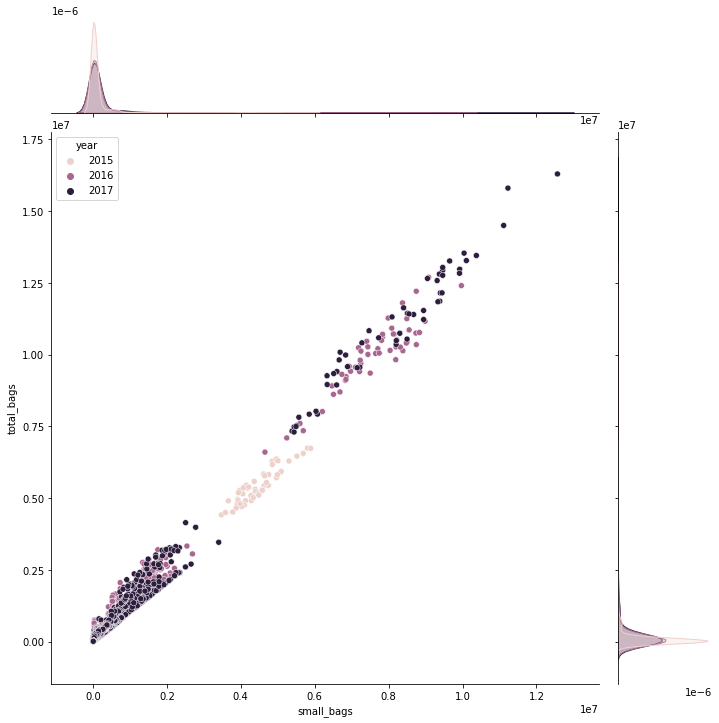

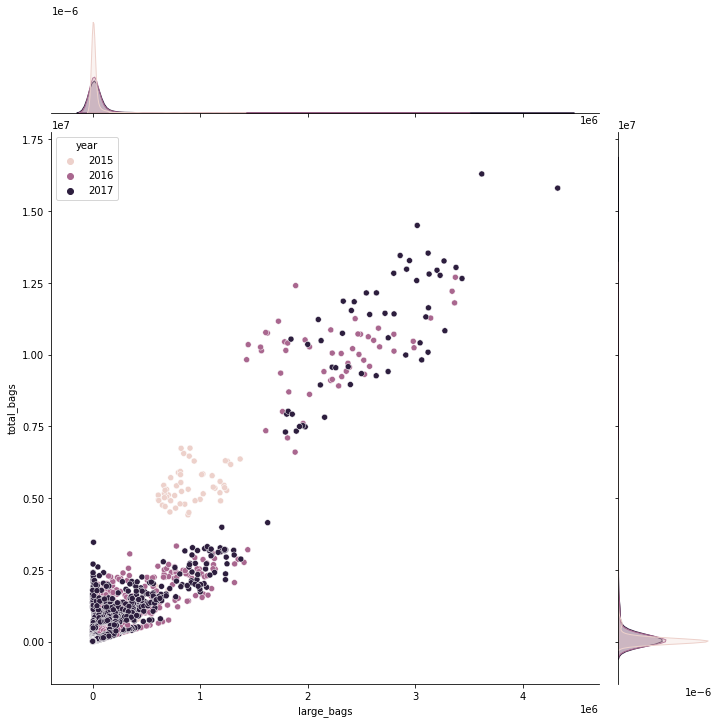

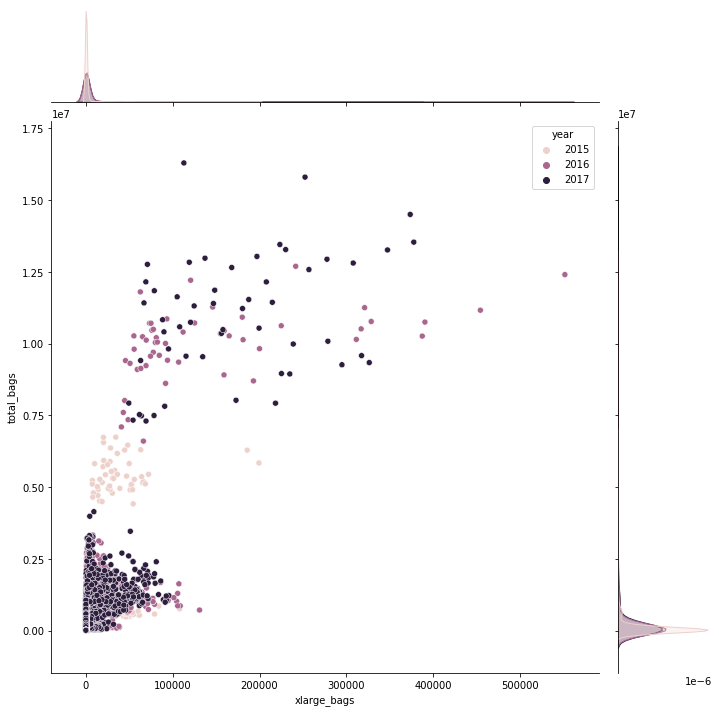

In [ ]:
for predictor in predictors:
  sns.jointplot(data=df, x=predictor, y=target, hue=categorial, height=pic_size)
  # sns.displot(data=df, x=predictor, y=target, hue=categorial, height=pic_size)
  # sns.displot(data=df, x=predictor, y=target, kind='kde', hue=categorial, height=pic_size)
  plt.plot()

### Step 2
I need to make an estimation of multivariate mathematical expectation and
variance.

In [ ]:
df.mean()

total_bags       228964.776198
year               2016.006312
average_price         1.410447
total_volume     834109.848000
4046             288244.617776
4225             293665.843429
4770              23233.041193
small_bags       174843.949139
large_bags        51202.252266
xlarge_bags        2918.574026
dtype: float64

In [ ]:
df.var()

total_bags       8.785458e+11
year             6.687308e-01
average_price    1.671173e-01
total_volume     1.143198e+13
4046             1.545792e+12
4225             1.435183e+12
4770             1.191954e+10
small_bags       5.102487e+11
large_bags       5.118503e+10
xlarge_bags      2.855521e+08
dtype: float64

### Step 3

You need to make a non-parametric estimation of conditional distributions,
mathematical expectations and variances.

In [ ]:
# sns.pairplot(df, hue='year',  kind='kde') # works too slow, don't use it please

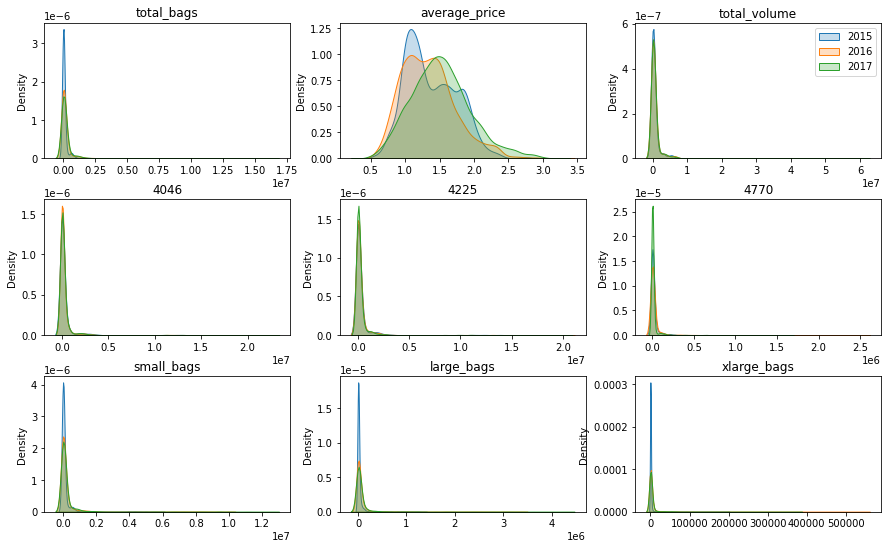

In [ ]:
plt.subplots(3, 3)
plt.subplots_adjust(wspace=0.2, hspace=0.3)
for i, col in enumerate([target]+predictors):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(df.loc[df['year'] == 2015, col], shade=True, label='2015')
    sns.kdeplot(df.loc[df['year'] == 2016, col], shade=True, label='2016')
    sns.kdeplot(df.loc[df['year'] == 2017, col], shade=True, label='2017')
    plt.xlabel('')
    plt.title(col)
    if i == 2:
        plt.legend(loc='upper right')
    else:
        plt.legend().remove()

plt.show()

In [ ]:
categorials = list(set(df[categorial]))
categorials.sort()
tab_list = [["Variable", "Categorial value - year", "Mean", "Variance"]]

for variable in [target]+predictors:
  for categorial_val in categorials:
    sample = df[df[categorial] == categorial_val]
    text=[variable, str(categorial_val), f"{sample.mean()[variable]}", f"{sample.var()[variable]}"]
    tab_list.append(text)

output = tabulate(tab_list, tablefmt='grid')
print(output)


+---------------+-------------------------+--------------------+---------------------+
| Variable      | Categorial value - year | Mean               | Variance            |
+---------------+-------------------------+--------------------+---------------------+
| total_bags    | 2015                    | 137523.10543722112 | 299599598598.933    |
+---------------+-------------------------+--------------------+---------------------+
| total_bags    | 2016                    | 260533.9862037044  | 1046507501039.5952  |
+---------------+-------------------------+--------------------+---------------------+
| total_bags    | 2017                    | 287712.11942327966 | 1269484482962.5771  |
+---------------+-------------------------+--------------------+---------------------+
| average_price | 2015                    | 1.3755903829029397 | 0.14107143175644488 |
+---------------+-------------------------+--------------------+---------------------+
| average_price | 2016                    |

In [ ]:
# first iteration vesion, don't use it

# categorials = set(df[categorial])

# for variable in [target]+predictors:
#   for categorial_val in categorials:
#     sample = df[df[categorial] == categorial_val]
    
#     head=[f"Mean of variable if {categorial} = {str(categorial_val)}", 
#           f"Variance of variable if {categorial} = {str(categorial_val)}"] 
#     text=[f"{sample.mean()[variable]}", f"{sample.var()[variable]}"] 
#     output = tabulate([head, text], tablefmt='grid')
#     print(output)

#     plt.figure(figsize=(20, 6))
#     min_variable, max_variable = sample[variable].min(), sample[variable].max()
  
#     ax = sns.histplot(sample[variable],
#                 stat="density", 
#                 label=variable + ' when ' + categorial + ' = ' + str(categorial_val))
    
#     # ax.set_yscale("log")
#     # plt.ylabel('log of p')
#     plt.title("Distribution plot")
#     plt.legend()
#     plt.show()


### Step 4
You need to make an estimation of pair correlation coefficients, confidence intervals
for them and significance levels.

In [ ]:
tab = [["Variable", "Target", "Pearson correlation coef", "Significance level", "Confidence interval"]]
for variable in predictors:
  a = 0.05
  r, p = scipy.stats.pearsonr(df[variable], df[target]) # Pearson's r and p from sampled data
  r_z = np.arctanh(r) # Convert r to z’ using Fisher’s z’ transform
  se = 1 / np.sqrt(df[variable].size - 3) # Sample standard error
  z = scipy.stats.norm.ppf(1 - a / 2) # Two-tail test, z - critical
  ci_down_z, ci_up_z = r_z - z * se, r_z + z * se 
  ci_down, ci_up = np.tanh((ci_down_z, ci_up_z))
  tab.append([variable, target, str(r), str(p), f"[{ci_down} ... {ci_up}]"])
print(tabulate(tab, headers="firstrow", tablefmt="grid"))

+---------------+------------+----------------------------+----------------------+-------------------------------------------------+
| Variable      | Target     |   Pearson correlation coef |   Significance level | Confidence interval                             |
+===============+============+============================+======================+=================================================+
| average_price | total_bags |                  -0.175604 |         1.77533e-117 | [-0.19015453098830631 ... -0.16097620279925814] |
+---------------+------------+----------------------------+----------------------+-------------------------------------------------+
| total_volume  | total_bags |                   0.961729 |         0            | [0.9605819237605958 ... 0.9628427318626996]     |
+---------------+------------+----------------------------+----------------------+-------------------------------------------------+
| 4046          | total_bags |                   0.915641 |         0

### Step 5
Choose a task formulation for regression. Estimate multivariate correlation (target -
predictors).

Task:

Predict **total_bags** based on *total_volume, year, average price , 4046, 4225, 4770, small_bags, large_bags, xlarge_bags* variables.

In [ ]:
# plt.figure(figsize=(16, 5))
# sns.heatmap(df.corr(method='pearson'), annot=True) # it's not good, because we can't aplly Pearson corr to nominal (year) variable

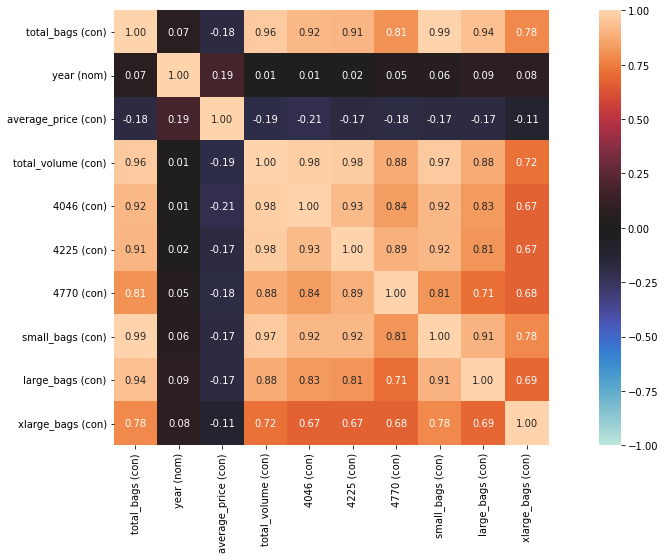

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f0a12b198d0>,
 'corr':                      total_bags (con)  ...  xlarge_bags (con)
 total_bags (con)             1.000000  ...           0.783131
 year (nom)                   0.069673  ...           0.082577
 average_price (con)         -0.175604  ...          -0.110380
 total_volume (con)           0.961729  ...           0.724850
 4046 (con)                   0.915641  ...           0.673740
 4225 (con)                   0.908233  ...           0.672197
 4770 (con)                   0.805506  ...           0.676191
 small_bags (con)             0.994748  ...           0.784957
 large_bags (con)             0.943722  ...           0.691423
 xlarge_bags (con)            0.783131  ...           1.000000
 
 [10 rows x 10 columns]}

In [ ]:
# one of the right way to find corr between nominal-numerical variables is dython method - associations
df["year"] = df["year"].apply(str)
associations(df, figsize=(18, 8), mark_columns=True)

As we can see, everything is highly correlated with each other. 

Let's apply PCA and see how many variables we need to take for regression.

In [ ]:
tmp = df.copy()
tmp = tmp.drop(columns=["average_price", "year", "total_bags"]) # drop non-correlating variables and target variable
std_df = scale(tmp)
std_df = pd.DataFrame(std_df, index=tmp.index, columns=tmp.columns)

In [ ]:
std_df.head()

,total_volume,4046,4225,4770,small_bags,large_bags,xlarge_bags
0,-0.227704,-0.231012,-0.199683,-0.212367,-0.232733,-0.225912,-0.172719
1,-0.230473,-0.231303,-0.207877,-0.212274,-0.231607,-0.225893,-0.172719
2,-0.211738,-0.231206,-0.154026,-0.211613,-0.233519,-0.225868,-0.172719
3,-0.223340,-0.230935,-0.185056,-0.212144,-0.236830,-0.225733,-0.172719
4,-0.231608,-0.231088,-0.208545,-0.212114,-0.236397,-0.225450,-0.172719


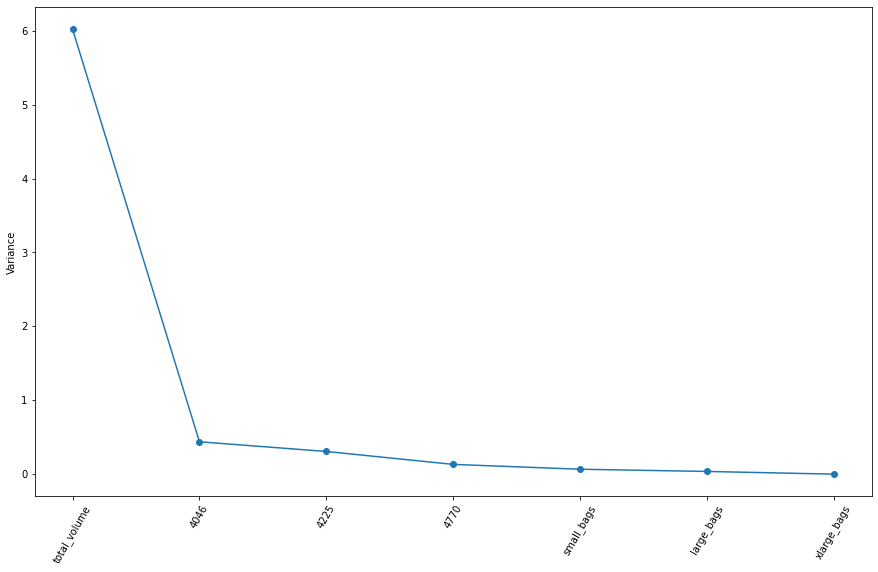

In [ ]:
pca = PCA().fit(std_df)
y = np.std(pca.transform(std_df), axis=0)**2
x = np.arange(len(y)) + 1
plt.plot(x, y, "o-")
plt.xticks(x, std_df.columns, rotation=60)
plt.ylabel("Variance")
plt.show()

Let's take variables **'total_volume', '4046', '4225', '4770',**

### Step 6
Build regression model and make an analysis of multicollinearity and regularization (if
needed).

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df.columns

Index(['total_bags', 'year', 'average_price', 'total_volume', '4046', '4225',
       '4770', 'small_bags', 'large_bags', 'xlarge_bags'],
      dtype='object')

In [ ]:
train, test = train_test_split(df[['total_volume', '4046', '4225', '4770', 'total_bags']].copy())

predictors = ['total_volume', '4046', '4225', '4770']
target = 'total_bags'
train_X = train[predictors]
train_y = train[target]
test_X = test[predictors]
test_y = test[target]

In [ ]:
random_state=1
tab = [["Type", "Alpha", "MSE", "R2", "Coeff - total_volume, 4046, 4225, 4770"]]

regr = linear_model.LinearRegression()
regr.fit(train_X, train_y)
predicted = regr.predict(test_X)
tab.append(["Least Squares model", "-" , str(mean_squared_error(test_y, predicted)), str(r2_score(test_y, predicted)), str(regr.coef_)])

best_lasso_alpha = -1
best_lasso_mse = inf
best_lasso_r2 = -1
best_lasso_coef = (0, 0, 0, 0)
for alpha in np.arange(0.0,1.001,0.001):
  regr = linear_model.Lasso(alpha=alpha, random_state=random_state)
  regr.fit(train_X, train_y)
  predicted = regr.predict(test_X)
  curr_lasso_mse = mean_squared_error(test_y, predicted)
  curr_lasso_r2 = r2_score(test_y, predicted)
  curr_lasso_coef = regr.coef_
  if curr_lasso_mse < best_lasso_mse and curr_lasso_r2 > best_lasso_r2:
    best_lasso_alpha = alpha
    best_lasso_mse = curr_lasso_mse
    best_lasso_r2 = curr_lasso_r2
    best_lasso_coef = curr_lasso_coef
  
tab.append(["Best Lasso model", best_lasso_alpha ,str(best_lasso_mse), str(best_lasso_r2), str(best_lasso_coef)])

best_ridge_alpha = -1
best_ridge_mse = inf
best_ridge_r2 = -1
best_ridge_coef = (0, 0, 0, 0)
for alpha in np.arange(0.0,1.001,0.001):
  regr = linear_model.Ridge(alpha=alpha, random_state=random_state)
  regr.fit(train_X, train_y)
  predicted = regr.predict(test_X)
  curr_ridge_mse = mean_squared_error(test_y, predicted)
  curr_ridge_r2 = r2_score(test_y, predicted)
  curr_ridge_coef = regr.coef_
  if curr_ridge_mse < best_ridge_mse and curr_ridge_r2 > best_ridge_r2:
    best_ridge_alpha = alpha
    best_ridge_mse = curr_ridge_mse
    best_ridge_r2 = curr_ridge_r2
    best_ridge_coef = curr_ridge_coef

tab.append(["Best Ridge model", best_ridge_alpha ,str(best_ridge_mse), str(best_ridge_r2), str(best_ridge_coef)])

print(tabulate(tab, headers="firstrow", tablefmt="grid"))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


+---------------------+---------+---------------+----------+---------------------------------------------------+
| Type                | Alpha   |           MSE |       R2 | Coeff - total_volume, 4046, 4225, 4770            |
+=====================+=========+===============+==========+===================================================+
| Least Squares model | -       | 276.903       | 1        | [ 0.99999561 -0.99999307 -0.99999521 -0.99999079] |
+---------------------+---------+---------------+----------+---------------------------------------------------+
| Best Lasso model    | 0.0     |   2.40876e+06 | 0.999998 | [ 0.99554331 -0.99436743 -0.99347005 -0.99673191] |
+---------------------+---------+---------------+----------+---------------------------------------------------+
| Best Ridge model    | 0.0     | 276.903       | 1        | [ 0.99999561 -0.99999307 -0.99999521 -0.99999079] |
+---------------------+---------+---------------+----------+------------------------------------

Linear regression showed the best result.

### Step 7
Analyze the quality of regression model (distribution of residuals, determination
coefficient).

In [ ]:
model = linear_model.LinearRegression()
model.fit(train_X, train_y)
predicted = model.predict(test_X)
print(tabulate([["Type", "Alpha", "MSE", "R2", "Coeff - total_volume, 4046, 4225, 4770"],
                ["Least Squares model", "-" ,str(mean_squared_error(test_y, predicted)), str(r2_score(test_y, predicted)), str(model.coef_)]], 
               tablefmt="grid"))


+---------------------+-------+--------------------+--------------------+---------------------------------------------------+
| Type                | Alpha | MSE                | R2                 | Coeff - total_volume, 4046, 4225, 4770            |
+---------------------+-------+--------------------+--------------------+---------------------------------------------------+
| Least Squares model | -     | 276.90260839004065 | 0.9999999997249893 | [ 0.99999561 -0.99999307 -0.99999521 -0.99999079] |
+---------------------+-------+--------------------+--------------------+---------------------------------------------------+


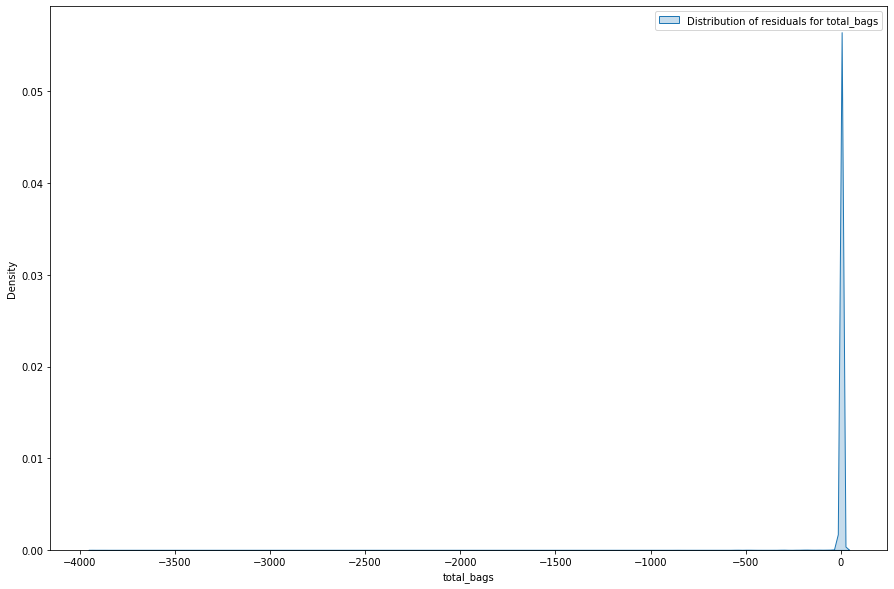

In [ ]:
residuals = df[target] - model.predict(df[predictors])
plt.figure(figsize=(15, 10))  
sns.kdeplot(residuals, shade=True, label=f'Distribution of residuals for {target}') 
# ax.set_yscale("log")
# plt.ylabel('log of p')
plt.legend()
plt.show()

In [ ]:
residuals.describe()

count    16953.000000
mean         0.193011
std         46.758812
min      -3934.180942
25%          1.717454
50%          1.740998
75%          1.852280
max         23.783233
Name: total_bags, dtype: float64

In [ ]:
result = scipy.stats.anderson(residuals, dist='norm')
print('Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.1f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.1f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 6205.874
15.0: 0.576, data does not look normal (reject H0)
10.0: 0.656, data does not look normal (reject H0)
5.0: 0.787, data does not look normal (reject H0)
2.5: 0.918, data does not look normal (reject H0)
1.0: 1.092, data does not look normal (reject H0)


In [ ]:
scipy.stats.kstest(residuals, 'norm',args=(residuals.mean(), residuals.var()))

KstestResult(statistic=0.49636831316265173, pvalue=0.0)

Residuals are not distributed normally.

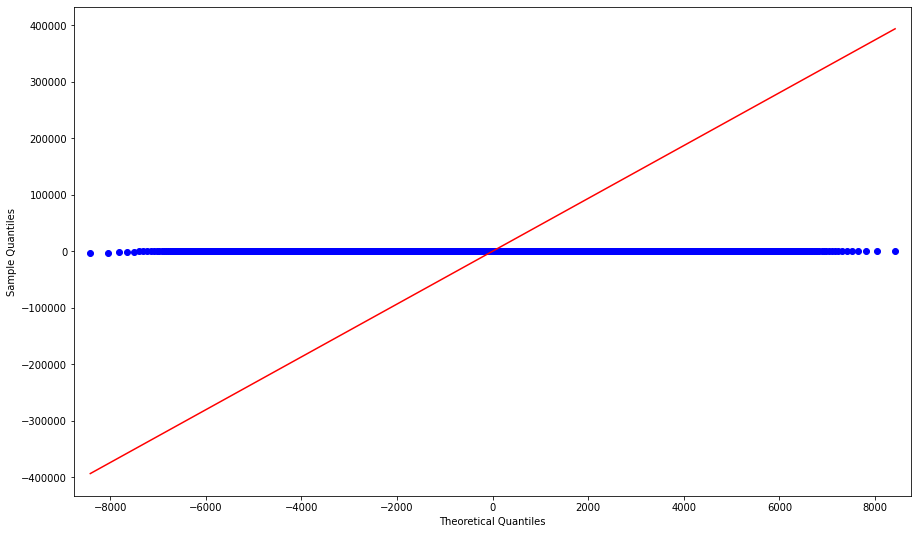

In [186]:
import pylab 
import statsmodels.api as sm

sm.qqplot(residuals, loc=residuals.mean(), scale=residuals.var(), line='s')
pylab.show()